In [62]:
%matplotlib inline

In [111]:
from __future__ import division

import sys

import numpy as np
import pandas as pd

import sklearn
from sklearn import svm

import entrainment_pred

In [78]:
full = pd.read_csv("data/step3/full.csv")

In [67]:
_, target_cols = entrainment_pred.separate_cols(full)

In [68]:
target_cols

{'avg_different_words',
 'avg_total_words',
 'pd_avg_total_different_words',
 'pd_avg_total_words'}

In [85]:
search_adw = entrainment_pred.run(full, 'avg_different_words')

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [86]:
search_adw.best_score_

-0.22068354414812291

In [87]:
search_atw = entrainment_pred.run(full, 'avg_total_words')

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [88]:
search_atw.best_score_

-0.16247361331191351

In [81]:
search_p_atw = entrainment_pred.run(full, 'pd_avg_total_words')

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [82]:
search_p_atw.best_score_

0.078913430156424977

In [83]:
search_p_atdw = entrainment_pred.run(full, 'pd_avg_total_different_words')

----------------------------------------------------------------------------------------------------
###################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################################

In [84]:
search_p_atdw.best_score_

0.14164525535726216

### Calculate Coefficients and Plot Closeness to Fit

In [158]:
def calc_coeffs(best_estimator, cv, data, target):

    def _calc_coeffs(predicted_hist):
        n_iter = cv.n_iter
        print('-' * n_iter)

        svr = best_estimator.named_steps['svr']
        def fit(train):
            best_estimator.fit(data.iloc[train], target.iloc[train])

        def predict(test):
            predicted = best_estimator.predict(data.iloc[test]).tolist()
            for i in test:
                predicted_hist[i].append(predicted.pop(0))

        def coeffs_fn():
            sys.stdout.write('#')
            return svr.coef_.copy()

        coeffs = entrainment_pred.calc_coeffs(cv, fit, coeffs_fn, predict)
        return coeffs, predicted_hist
    
    return _calc_coeffs({i:[] for i in range(len(target))})
    

In [159]:
data_adw, target_adw = entrainment_pred.separate(full, 'avg_different_words')
coeffs_adw, predict_hist_adw = calc_coeffs(search_adw.best_estimator_, search_adw.cv, data_adw, target_adw)

----------------------------------------------------------------------------------------------------
####################################################################################################

In [354]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)

def plot(predict_hist, target, title, sort=True, agg=np.mean, save=True):
    x = range(len(target))
    pmns = np.array([agg(predict_hist[i]) for i in range(len(predict_hist))])
    
    plt_indices = np.argsort(target) if sort else x
    
    plt.scatter(x, pmns[plt_indices], c='y')
    p = plt.plot(target.get_values()[plt_indices], marker='*')
    plt.title(title)
    plt.legend(["truth", "mean pred."], bbox_to_anchor=[.9, 1.0])
    msg = 'corr: %.2f' % np.corrcoef(pmns, target.get_values())[0][1]
    plt.text(.6, .95, msg, verticalalignment='top', fontsize=12, 
         horizontalalignment='right', transform=p[0].axes.transAxes)
    
    if save:
        plt.savefig(title + '.jpg')

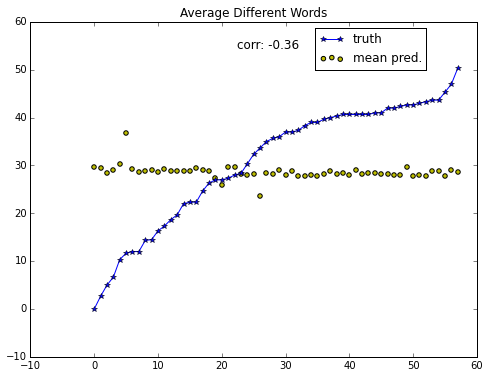

In [355]:
plot(predict_hist_adw, target_adw, 'Average Different Words')

In [162]:
data_atw, target_atw = entrainment_pred.separate(full, 'avg_total_words')
coeffs_atw, predict_hist_atw = calc_coeffs(search_atw.best_estimator_, search_atw.cv, data_atw, target_atw)

----------------------------------------------------------------------------------------------------
####################################################################################################

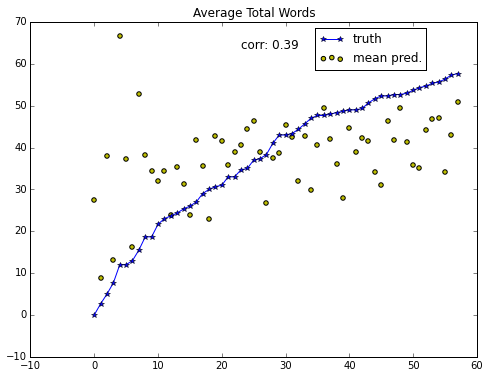

In [356]:
plot(predict_hist_atw, target_atw, 'Average Total Words')

In [164]:
data_p_atw, target_p_atw = entrainment_pred.separate(full, 'pd_avg_total_words')
coeffs_p_atw, predict_hist_p_atw = calc_coeffs(search_p_atw.best_estimator_, 
                                           search_p_atw.cv, 
                                           data_p_atw, 
                                           target_p_atw)

----------------------------------------------------------------------------------------------------
####################################################################################################

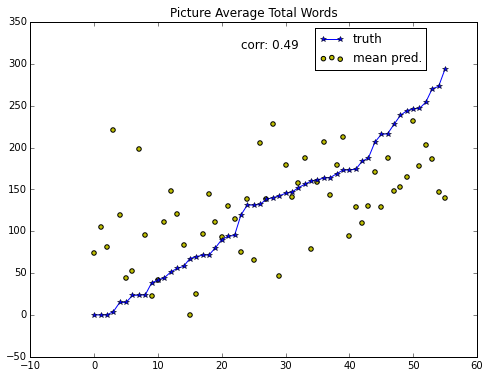

In [357]:
plot(predict_hist_p_atw, target_p_atw, 'Picture Average Total Words')

In [166]:
data_p_atdw, target_p_atdw = entrainment_pred.separate(full, 'pd_avg_total_different_words')
coeffs_p_atdw, predict_hist_p_atdw = calc_coeffs(search_p_atdw.best_estimator_, 
                                           search_p_atdw.cv, 
                                           data_p_atdw, 
                                           target_p_atdw)

----------------------------------------------------------------------------------------------------
####################################################################################################

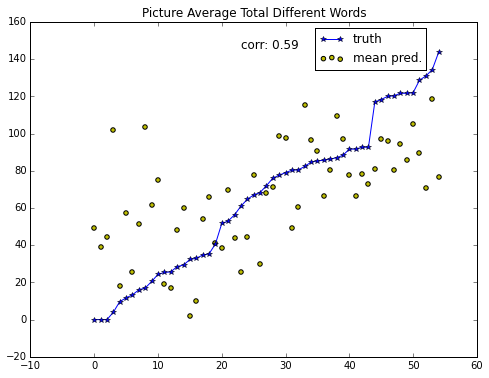

In [358]:
plot(predict_hist_p_atdw, target_p_atdw, 'Picture Average Total Different Words')

In [316]:
[ "%s, %.2f, %.2f, %.2f" % (i, 
                      np.mean(predict_hist_p_atw[i]), 
                      np.median(predict_hist_p_atw[i]),
                     np.std(predict_hist_p_atw[i])) 
 for i in predict_hist_p_atw]

['0, 23.15, 20.68, 15.30',
 '1, 119.53, 120.27, 21.86',
 '2, 93.24, 91.65, 23.41',
 '3, 74.11, 69.29, 23.56',
 '4, 130.75, 128.03, 14.14',
 '5, 43.67, 41.01, 12.49',
 '6, 96.59, 96.69, 13.82',
 '7, 75.40, 76.55, 14.93',
 '8, 121.18, 121.38, 22.75',
 '9, 46.27, 52.43, 14.17',
 '10, 65.89, 71.29, 16.02',
 '11, 24.75, 23.93, 12.58',
 '12, 148.22, 154.51, 15.97',
 '13, 115.16, 116.18, 16.47',
 '14, 129.99, 132.16, 23.01',
 '15, -0.46, -1.95, 9.46',
 '16, 78.49, 76.09, 13.21',
 '17, 179.67, 178.99, 10.35',
 '18, 52.70, 55.44, 14.30',
 '19, 95.67, 95.53, 20.76',
 '20, 179.01, 176.80, 14.56',
 '21, 221.52, 220.29, 12.33',
 '22, 81.32, 83.77, 9.75',
 '23, 109.74, 111.54, 12.88',
 '24, 111.03, 107.03, 14.42',
 '25, 140.18, 138.49, 14.98',
 '26, 144.78, 144.57, 15.46',
 '27, 94.70, 85.95, 43.99',
 '28, 42.22, 41.47, 16.16',
 '29, 139.07, 134.19, 18.13',
 '30, 140.97, 146.02, 16.88',
 '31, 128.98, 126.56, 15.51',
 '32, 158.47, 156.44, 28.02',
 '33, 105.56, 107.96, 16.54',
 '34, 231.39, 232.90, 14